In [2]:
import os

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.lines as mlines

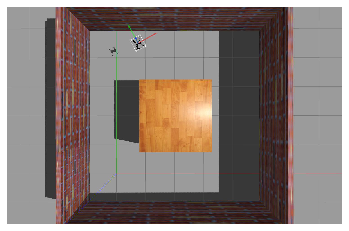

In [4]:
background_file = f'{os.environ["HOME"]}/code/imitation-learning-codebase/src/sim/ros/'\
                  f'gazebo/background_images/cube_world_validate_2_2_10.jpg'
background_image = Image.open(background_file)
plt.imshow(background_image)
plt.axis('off')
plt.show()

In [24]:
# Robot points
points_robot = [np.asarray([0.1, 0, 0, 1]), np.asarray([0, 0, 0, 1])]
# Robot to global transformation
yaw = 0.5
robot_global_rotation = np.asarray([
    [np.cos(yaw), -np.sin(yaw), 0],
    [np.sin(yaw), np.cos(yaw), 0],
    [0, 0, 1]
])
robot_global_translation = np.asarray([1, 4, 2])
robot_global_transformation = np.zeros((4, 4))
robot_global_transformation[0:3, 0:3] = robot_global_rotation[:, :]
robot_global_transformation[0:3, 3] = robot_global_translation
robot_global_transformation[3, 3] = 1
print(f'robot_global_transformation: \n {robot_global_transformation}')

points_global = [np.matmul(robot_global_transformation, p) for p in points_robot]
print(f'points_global: \n {points_global}')


robot_global_transformation: 
 [[ 0.87758256 -0.47942554  0.          1.        ]
 [ 0.47942554  0.87758256  0.          4.        ]
 [ 0.          0.          1.          2.        ]
 [ 0.          0.          0.          1.        ]]
points_global: 
 [array([1.08775826, 4.04794255, 2.        , 1.        ]), array([1., 4., 2., 1.])]


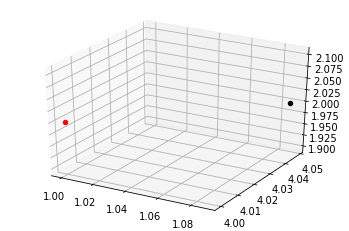

In [25]:
# points_global.append(np.asarray([0, 0, 0, 1]))
# points_global = [np.asarray([0, 0, 0, 1]),
#                 np.asarray([1, 0, 0, 1]),
#                 np.asarray([0, 1, 0, 1]),
#                 np.asarray([0, 0, 1, 1])]

colors = ['black', 'red', 'green', 'blue']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for index, p in enumerate(points_global):
    ax.scatter([p[0]],
               [p[1]],
               [p[2]], color=colors[index])
plt.show()

points_camera: 
 [array([ 2.04794255,  0.        , -8.91224174,  1.        ]), array([ 2.,  0., -9.,  1.])]


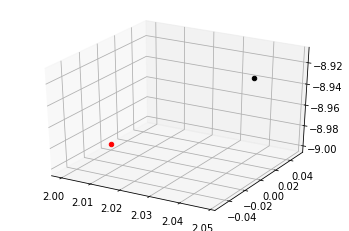

In [26]:
# Camera pose
camera_global_translation = np.asarray([2, 2, 10])
# combine 2 rotations with https://www.andre-gaschler.com/rotationconverter/
camera_global_rotation = np.asarray([
    [0, 0, 1],
    [1, 0, 0],
    [0, 1, 0]
])
global_camera_rotation = np.transpose(camera_global_rotation)

global_camera_translation = -camera_global_translation
global_camera_transformation = np.zeros((4, 4))
global_camera_transformation[0:3, 0:3] = global_camera_rotation[:, :]
global_camera_transformation[0:3, 3] = global_camera_translation
global_camera_transformation[3, 3] = 1

points_camera = [np.matmul(global_camera_transformation, p) for p in points_global]
print(f'points_camera: \n {points_camera}')
colors = ['black', 'red', 'green', 'blue']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for index, p in enumerate(points_camera):
    ax.scatter([p[0]],
               [p[1]],
               [p[2]], color=colors[index])
plt.show()

points_camera2: 
 [array([8.91224174, 2.04794255, 0.        , 1.        ]), array([9., 2., 0., 1.])]


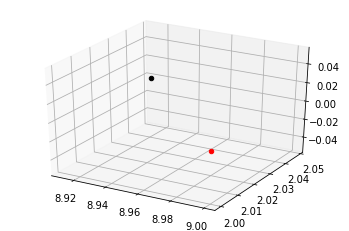

In [28]:
# Camera intrinsics frame
R_c1_c2 = np.asarray([
    [0, -1, 0],
    [0, 0, 1],
    [1, 0, 0]
])
global_camera2_rotation = np.matmul(R_c1_c2, global_camera_rotation)
global_camera2_transformation = np.zeros((4, 4))
global_camera2_transformation[0:3, 0:3] = global_camera2_rotation[:, :]
global_camera2_transformation[3, 3] = 1
points_camera2 = [np.matmul(global_camera2_transformation, p) for p in points_camera]
print(f'points_camera2: \n {points_camera2}')
colors = ['black', 'red', 'green', 'blue']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for index, p in enumerate(points_camera2):
    ax.scatter([p[0]],
               [p[1]],
               [p[2]], color=colors[index])
plt.show()

In [7]:
# From 3d points in camera frames to pixel coordinates
height = 964
width = 1489

In [10]:
def draw_pix(pixel_coordinates):
    background_file = f'{os.environ["HOME"]}/code/imitation-learning-codebase/src/sim/ros/'\
                      f'gazebo/background_images/cube_world_validate_2_2_10.jpg'
    background_image = Image.open(background_file)
    fig, ax = plt.subplots()
    ax.imshow(background_image)
    colors = ['red', 'green', 'blue']
    for index, p in enumerate(pixel_coordinates[1:]):
        xmin = pixel_coordinates[0][0]
        ymin = pixel_coordinates[0][1]
        l = mlines.Line2D([xmin,p[0]], [ymin,p[1]], color=colors[index])
        ax.add_line(l)
        plt.scatter(p[0], p[1], s=10, color=colors[index])
    plt.axis('off')
    plt.show()

points_global: 
 [array([0., 0., 0., 1.]), array([1., 0., 0., 1.]), array([0., 1., 0., 1.]), array([0., 0., 1., 1.])]
points_camera: [array([ -2.,  -2., -10.]), array([ -1.,  -2., -10.]), array([ -2.,  -1., -10.]), array([-2., -2., -9.])]
points_camera: [array([ 2., -2., 10.]), array([ 1., -2., 10.]), array([ 2., -1., 10.]), array([ 2., -2.,  9.])]
[array([ 2., -2., 10.]), array([ 1., -2., 10.]), array([ 2., -1., 10.]), array([ 2., -2.,  9.])]
[array([486.43946462, 747.00272606,   1.        ]), array([615.46973231, 747.00272606,   1.        ]), array([486.43946462, 614.50136303,   1.        ]), array([457.7660718, 776.4474734,   1.       ])]


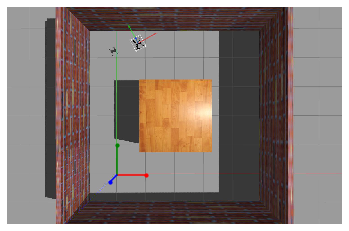

In [19]:
# Robot global position
points_robot = [np.asarray([0, 0, 0, 1]),
                np.asarray([1, 0, 0, 1]),
                np.asarray([0, 1, 0, 1]),
                np.asarray([0, 0, 1, 1])]
yaw = 0.5
robot_global_rotation = np.asarray([
    [np.cos(yaw), -np.sin(yaw), 0],
    [np.sin(yaw), np.cos(yaw), 0],
    [0, 0, 1]
])
robot_global_translation = np.asarray([1, 4, 2])
robot_global_transformation = np.zeros((4, 4))
robot_global_transformation[0:3, 0:3] = robot_global_rotation[:, :]
robot_global_transformation[0:3, 3] = robot_global_translation
robot_global_transformation[3, 3] = 1
points_global = [np.matmul(robot_global_transformation, p) for p in points_robot]
print(f'points_global: \n {points_global}')

# Camera extrinsics
# points_global = [np.asarray([0, 0, 0, 1]),
#                  np.asarray([1, 0, 0, 1]),
#                  np.asarray([0, 1, 0, 1]),
#                  np.asarray([0, 0, 1, 1])]

R_camera_global = np.asarray([
    [-1, 0, 0],
    [0, 1, 0],
    [0, 0, -1]
])
t_camera_global = np.asarray([2, 2, 10])

points_camera = [p[:3] - t_camera_global for p in points_global]
print(f'points_camera: {points_camera}')
points_camera = [np.matmul(np.transpose(R_camera_global), p) for p in points_camera]
# camera_global_transformation = np.zeros((4, 4))
# camera_global_transformation[0:3, 0:3] = R_camera_global[:, :]
# camera_global_transformation[0:3, 3] = t_camera_global
# camera_global_transformation[3, 3] = 1
# global_camera_transformation = np.linalg.inv(camera_global_transformation)
# points_camera = [np.matmul(global_camera_transformation, p)[:3] for p in points_global]
print(f'points_camera: {points_camera}')

# Camera intrinsics
horizontal_field_of_view = 60*3.14/180
vertical_field_of_view = 40*3.14/180
fx = -width/2*np.tan(horizontal_field_of_view/2)**(-1)
fy = -height/2*np.tan(vertical_field_of_view/2)**(-1)
# print(f'focal length: {fx}, {fy}')
K = np.asarray([
    [fx, 0, 1489/2],
    [0, fy, 964/2],
    [0, 0, 1]
])
# Draw and calculate

# points_camera = [np.asarray([0, 0, 10]),
#                  np.asarray([1, 0, 10]),
#                  np.asarray([0, 1, 10])]
print(points_camera)
pixel_coordinates = [np.matmul(K, p) for p in points_camera]
pixel_coordinates = [p/p[2] for p in pixel_coordinates]
print(pixel_coordinates)

draw_pix(pixel_coordinates)

In [16]:
background_file = f'{os.environ["HOME"]}/code/imitation-learning-codebase/src/sim/ros/'\
                      f'gazebo/background_images/cube_world_validate.jpg'
background_image = Image.open(background_file)
background_image.size


FileNotFoundError: [Errno 2] No such file or directory: '/users/visics/kkelchte/code/imitation-learning-codebase/src/sim/ros/gazebo/background_images/cube_world_validate.jpg'

In [18]:
height/2

482.0